In [1]:
#Importación de librerías visuales y de modificación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
#Funciones para la utilización de dataframes
#Convertir las columnas
def convertir_ip1(s):
    return s.split('.')[0]

def convertir_ip2(s):
    return s.split('.')[1]
def convertir_ip3(s):
    return s.split('.')[2]
def convertir_ip4(s):
    return s.split('.')[3]
#Crear una nueva columna llamada 'target' para predecir valores
def crear_target(row):
    ip = row['Destination IP Address']
    puerto = row['Destination Port']
    if ip in malwares_set:
        return 1
    elif puerto in puertos:
        return 1
    else:
        return 0
columas_deseadas = ['Source IP Address', 'Source Port', 'Destination IP Address', 'Destination Port']

In [3]:
#Obtener los valores malwares
url_malicioso = 'https://raw.githubusercontent.com/duggytuxy/malicious_ip_addresses/main/botnets_zombies_scanner_spam_ips.txt'
respuesta = requests.get(url_malicioso)
if respuesta.status_code == 200:
    malware1 = respuesta.text
malware1 = malware1.split('\r\n')

url_malicioso = 'https://raw.githubusercontent.com/duggytuxy/malicious_ip_addresses/main/blacklist_ips_for_fortinet_firewall_ab.txt'
respuesta = requests.get(url_malicioso)
if respuesta.status_code == 200:
    malware2 = respuesta.text
malware2 = malware2.split('\r\n')
malwares = malware1 + malware2
malwares_set = set(malwares)

url_malicioso = 'https://raw.githubusercontent.com/mthcht/awesome-lists/main/Lists/suspicious_ports_list.csv'
respuesta = requests.get(url_malicioso)
if respuesta.status_code == 200:
    puerto = pd.read_csv(url_malicioso)
puerto = puerto['dest_port'].to_list()
puertos = set(puerto)



In [4]:
#Obtener datos del primer csv
df_grande = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')
#Se cambia el nombre de las columnas
df_grande = df_grande.rename(columns = {'Source.IP': 'Source IP Address', 'Source.Port': 'Source Port', 'Destination.IP': 'Destination IP Address', 'Destination.Port': 'Destination Port'})
df_grande = df_grande[columas_deseadas]
#Se eliminan las ips duplicadas
df_grande = df_grande.drop_duplicates(subset=['Destination IP Address'], keep = 'first')

#Se crea la columna target
df_grande['target'] = df_grande.apply(lambda row: crear_target(row), axis=1)


In [6]:
#Separar solo los malwares del primer dataframe
df_grande_malwares = df_grande[df_grande['target'] == 1]
#Convertir las ips
df_grande_malwares['Source IP Address 1'] = df_grande_malwares['Source IP Address'].apply(convertir_ip1)
df_grande_malwares['Source IP Address 2'] = df_grande_malwares['Source IP Address'].apply(convertir_ip2)
df_grande_malwares['Source IP Address 3'] = df_grande_malwares['Source IP Address'].apply(convertir_ip3)
df_grande_malwares['Source IP Address 4'] = df_grande_malwares['Source IP Address'].apply(convertir_ip4)
df_grande_malwares.drop('Source IP Address', axis = 1, inplace = True)
df_grande_malwares['Destination IP Address 1'] = df_grande_malwares['Destination IP Address'].apply(convertir_ip1)
df_grande_malwares['Destination IP Address 2'] = df_grande_malwares['Destination IP Address'].apply(convertir_ip2)
df_grande_malwares['Destination IP Address 3'] = df_grande_malwares['Destination IP Address'].apply(convertir_ip3)
df_grande_malwares['Destination IP Address 4'] = df_grande_malwares['Destination IP Address'].apply(convertir_ip4)
df_grande_malwares.drop('Destination IP Address', axis = 1, inplace = True)

C:\Users\genyg\AppData\Local\Temp\ipykernel_18536\20122049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grande_malwares['Source IP Address 1'] = df_grande_malwares['Source IP Address'].apply(convertir_ip1)
C:\Users\genyg\AppData\Local\Temp\ipykernel_18536\20122049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grande_malwares['Source IP Address 2'] = df_grande_malwares['Source IP Address'].apply(convertir_ip2)
C:\Users\genyg\AppData\Local\Temp\ipykernel_18536\20122049.py:6: SettingWithCopy

In [17]:
#leer un dataset de ataques de ciberseguridad
df_malo = pd.read_csv('cybersecurity_attacks.csv')

#Se filtran solo las columnas deseadas
columas_deseadas = ['Source IP Address', 'Source Port', 'Destination IP Address', 'Destination Port']
df_malo = df_malo[columas_deseadas]
df_malo = df_malo.drop_duplicates(subset=['Destination IP Address'], keep = 'first')

#Se crea la columna 'target' para predecir el modelo
df_malo['target'] = df_malo.apply(lambda row: crear_target(row), axis=1)

#Se dividen las ips
df_malo['Destination IP Address 1'] = df_malo['Destination IP Address'].apply(convertir_ip1)
df_malo['Destination IP Address 2'] = df_malo['Destination IP Address'].apply(convertir_ip2)
df_malo['Destination IP Address 3'] = df_malo['Destination IP Address'].apply(convertir_ip3)
df_malo['Destination IP Address 4'] = df_malo['Destination IP Address'].apply(convertir_ip4)
df_malo.drop('Destination IP Address', axis = 1, inplace = True)

df_malo['Source IP Address 1'] = df_malo['Source IP Address'].apply(convertir_ip1)
df_malo['Source IP Address 2'] = df_malo['Source IP Address'].apply(convertir_ip2)
df_malo['Source IP Address 3'] = df_malo['Source IP Address'].apply(convertir_ip3)
df_malo['Source IP Address 4'] = df_malo['Source IP Address'].apply(convertir_ip4)
df_malo.drop('Source IP Address', axis = 1, inplace = True)

In [18]:
#Cantidad de ips/puertos maliciosos (confirmados)
df_malo['target'].value_counts()

target
0    39881
1      119
Name: count, dtype: int64

In [19]:
#valores conseguidos de un tráfico capturado
df = pd.read_csv('captured_traffict.csv')
#Se crean columnas para eliminar duplicados
df['Destination IP Address'] = df['Destination IP Address 1'].astype(str) + '.' + df['Destination IP Address 2'].astype(str) + '.' + df['Destination IP Address 3'].astype(str) + '.' + df['Destination IP Address 4'].astype(str)
df = df.drop_duplicates(subset=['Destination IP Address'], keep = 'first')
df = df.reset_index(drop = True)
df.drop('Good/Evil', axis = 1, inplace = True)
#Se crea una columna 'target' para predecir el modelo

df['target'] = df.apply(lambda row: crear_target(row), axis=1)
df.drop('Destination IP Address', axis = 1, inplace = True)

In [20]:
#Cantidad de ip/puertos considerados maliciosos (confirmado)
df['target'].value_counts()

target
0    357
1      5
Name: count, dtype: int64

In [29]:
#Se filtran los valores en target
df_malo_malwares = df_malo[df_malo['target'] == 1]
df_malo_buenos = df_malo[df_malo['target'] == 0]
df_malo_buenos = df_malo_buenos.sample(n = 6000)

In [30]:
#Se combinan todas los datasets
df_combinado = 1
df_combinado = pd.concat([df,df_malo_malwares, df_grande_malwares])
df_combinado_combinado = 1
df_combinado_combinado = pd.concat([df_combinado,df_malo_buenos])
df_combinado_combinado.reset_index(drop = True)

,Source Port,Destination Port,Source IP Address 1,Source IP Address 2,Source IP Address 3,Source IP Address 4,Destination IP Address 1,Destination IP Address 2,Destination IP Address 3,Destination IP Address 4,target
0,40789,1194,10,10,10,39,5,34,178,99,0
1,1194,40789,5,34,178,99,10,10,10,39,0
2,5353,5353,10,10,10,39,224,0,0,251,0
3,443,56026,38,56,122,112,10,10,10,112,0
4,443,49201,38,56,122,112,10,10,10,166,0
...,...,...,...,...,...,...,...,...,...,...,...
6546,56802,26068,42,172,250,179,56,134,150,193,0
6547,47586,35112,56,142,131,158,118,114,130,227,0
6548,49290,18977,197,241,238,225,220,22,19,236,0
6549,22806,48531,179,236,181,94,210,49,38,225,0


In [31]:
df_combinado_combinado['target'].value_counts()

target
0    6357
1     194
Name: count, dtype: int64

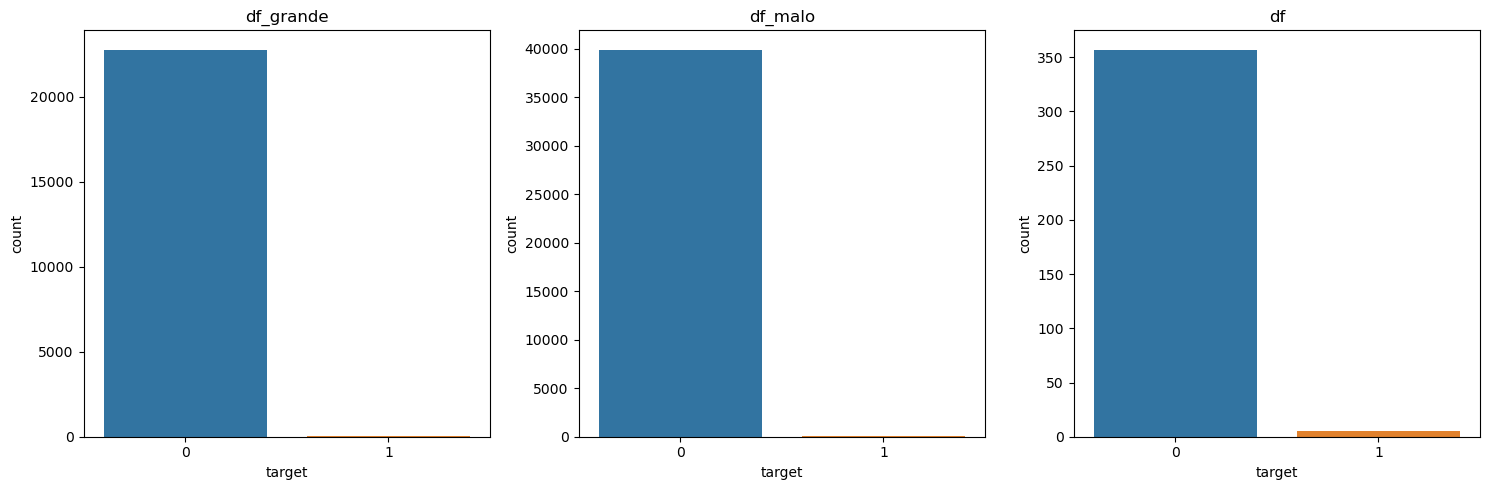

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Trazar countplot para df_grande en el primer subgráfico
sns.countplot(x='target', data=df_grande, ax=axs[0])
axs[0].set_title('df_grande')

# Trazar countplot para df_malo en el segundo subgráfico
sns.countplot(x='target', data=df_malo, ax=axs[1])
axs[1].set_title('df_malo')

# Trazar countplot para df en el tercer subgráfico
sns.countplot(x='target', data=df, ax=axs[2])
axs[2].set_title('df')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<Axes: xlabel='target', ylabel='count'>

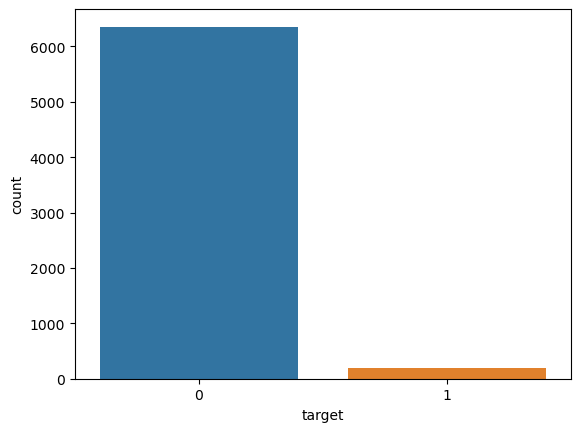

In [32]:
#cantidad de ips/puertos maliciosos encontrados con respecto a los 'buenos'
sns.countplot(x = 'target', data = df_combinado_combinado)

In [1]:
plt.figure(figsize = (20,30))
sns.countplot(x = 'Destination Port', data = df)

NameError: name 'plt' is not defined

In [35]:
df_combinado_combinado.isnull().sum()

Source Port                 0
Destination Port            0
Source IP Address 1         0
Source IP Address 2         0
Source IP Address 3         0
Source IP Address 4         0
Destination IP Address 1    0
Destination IP Address 2    0
Destination IP Address 3    0
Destination IP Address 4    0
target                      0
dtype: int64

In [67]:
#Implementación del modelo
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
from keras import regularizers


# Separar la tabla en todos los datos y la columna 'target'
X = df_combinado_combinado.drop('target', axis=1)
X = X.reset_index(drop = True)
y = df_combinado_combinado['target']
y = y.reset_index(drop = True)

# Escalar características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sobremuestreo de las clases minoritarias, esto es necesario por la poca cantidad de ips maliciosos
oversampler = RandomOverSampler(random_state=101)
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)

# Definir la arquitectura del modelo (red neuronal de 1 input, 2 hidden layers, 1 output)
model = Sequential()

#Input
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

#Hidden layers
model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

#output
model.add(Dense(1, activation='sigmoid'))

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=120, batch_size=32, validation_data =(X_test,y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Hacer predicciones
predicciones = model.predict(X_test)
predicciones = (predicciones > 0.5).astype('int32')


Epoch 1/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5158 - loss: 0.7203 - val_accuracy: 0.7567 - val_loss: 0.5604
Epoch 2/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7176 - loss: 0.5751 - val_accuracy: 0.7788 - val_loss: 0.4915
Epoch 3/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7622 - loss: 0.5322 - val_accuracy: 0.7950 - val_loss: 0.4741
Epoch 4/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7782 - loss: 0.5079 - val_accuracy: 0.7990 - val_loss: 0.4619
Epoch 5/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7775 - loss: 0.5005 - val_accuracy: 0.8050 - val_loss: 0.4531
Epoch 6/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.4896 - val_accuracy: 0.8105 - val_loss: 0.4488
Epoch 7/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4834 - val_accuracy: 0.8142 - val_loss: 0.4371
Epoch 8/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4610 - val_accu

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
#Se muestra que tan bien lo hizo el modelo en un entorno controlado
predicciones = model.predict(X_test)
predicciones = (predicciones > 0.5).astype('int32')

print(classification_report(y_test,predicciones))
print(confusion_matrix(y_test,predicciones))

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1910
           1       0.86      0.87      0.87      1905

    accuracy                           0.87      3815
   macro avg       0.87      0.87      0.87      3815
weighted avg       0.87      0.87      0.87      3815

[[1650  260]
 [ 251 1654]]


In [88]:
#Se guarda el modelo
from tensorflow.keras.models import load_model
model.save('modelo_para_predecir_malwares4.h5')  
import joblib
joblib.dump(scaler, 'scaler_para_predecir_malwares4.joblib')

['scaler_para_predecir_malwares3.joblib']

In [80]:
#Se obtienen datos para probar
df_prueba = df_malo_buenos.reset_index(drop= True)
nuevo_orden_columnas = ['Source Port', 'Destination Port','Source IP Address 1',
                        'Source IP Address 2', 'Source IP Address 3', 'Source IP Address 4','Destination IP Address 1', 'Destination IP Address 2',
                        'Destination IP Address 3', 'Destination IP Address 4']
df_prueba = df_prueba.reindex(columns=nuevo_orden_columnas)

In [81]:
#Se escalan
X_nuevos = df_prueba  
X_nuevos = scaler.transform(X_nuevos)


In [83]:
#Se predicen
prediccion = model.predict(X_nuevos)
prediccion = (prediccion > 0.5).astype('int32')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


In [85]:
prediccion

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [86]:
num_ones = np.count_nonzero(prediccion)


In [87]:
#Cantidad de ips/puertos que la inteligencia artificial detectó como 'malicioso' de 40,000 datos
num_ones

834